In [68]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [69]:
df = pd.read_csv('stud.csv')

In [70]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [71]:
df.shape

(1000, 8)

In [72]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [73]:
df.duplicated().sum()


0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [75]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [76]:
#Unique groups for each category
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [77]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [78]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
#Nuber of students with full marks in each subject
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [80]:
#Number of students with less than 20 marks in each subject
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Histogram &KDE

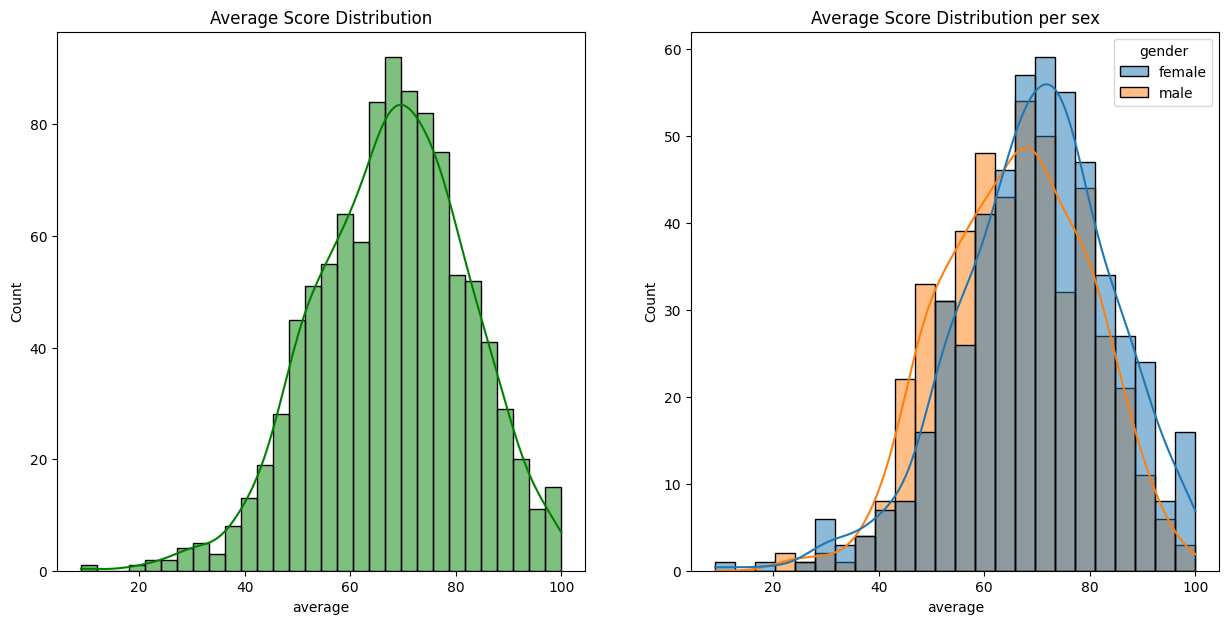

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Average Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Average Score Distribution per sex')
plt.show()

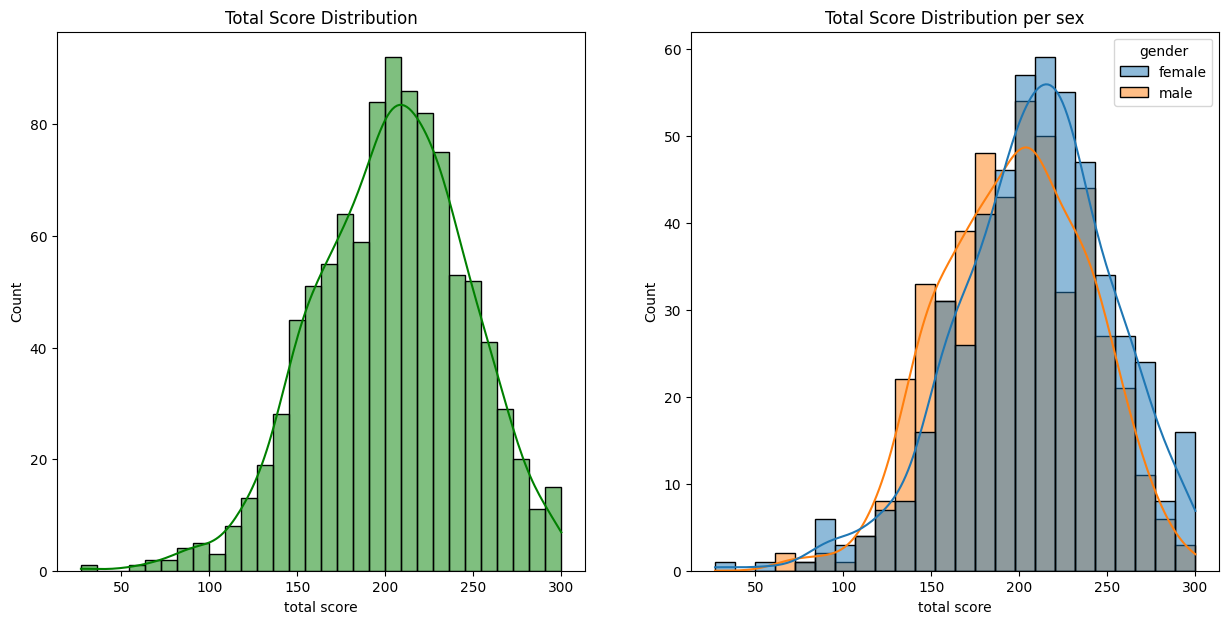

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.title('Total Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.title('Total Score Distribution per sex')
plt.show()

So as we can see from the above women tend to have better total score than male.  

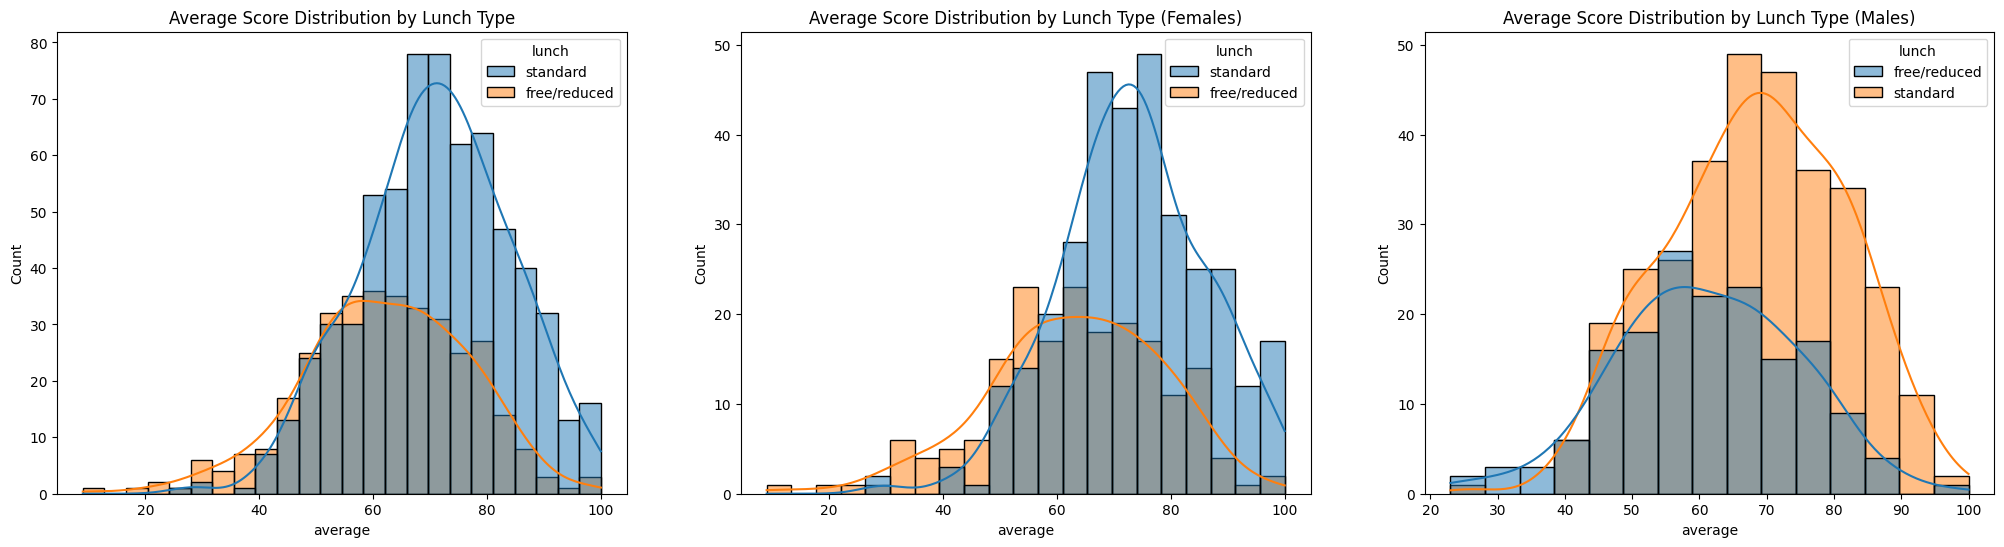

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot average score distribution by lunch type
axs[0].set_title('Average Score Distribution by Lunch Type')
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])

# Plot average score distribution by lunch type for females
axs[1].set_title('Average Score Distribution by Lunch Type (Females)')
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])

# Plot average score distribution by lunch type for males
axs[2].set_title('Average Score Distribution by Lunch Type (Males)')
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])

plt.show()

# Standard lunch contributes to better performance for both male and female

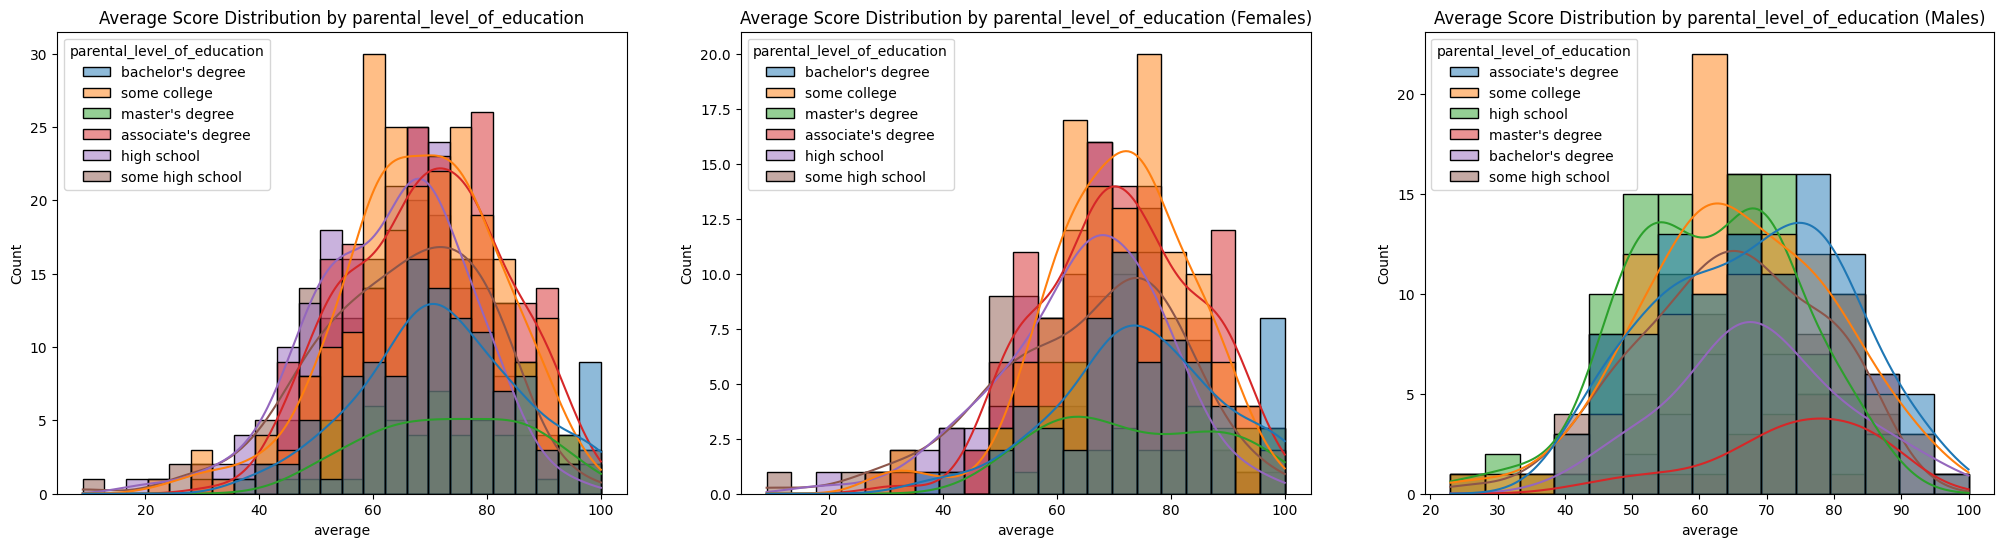

In [84]:
# Plot average score distribution by parental level of education
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot average score distribution by lunch type
axs[0].set_title('Average Score Distribution by parental_level_of_education')
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])

# Plot average score distribution by lunch type for females
axs[1].set_title('Average Score Distribution by parental_level_of_education (Females)')
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])

# Plot average score distribution by lunch type for males
axs[2].set_title('Average Score Distribution by parental_level_of_education (Males)')
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])

plt.show()

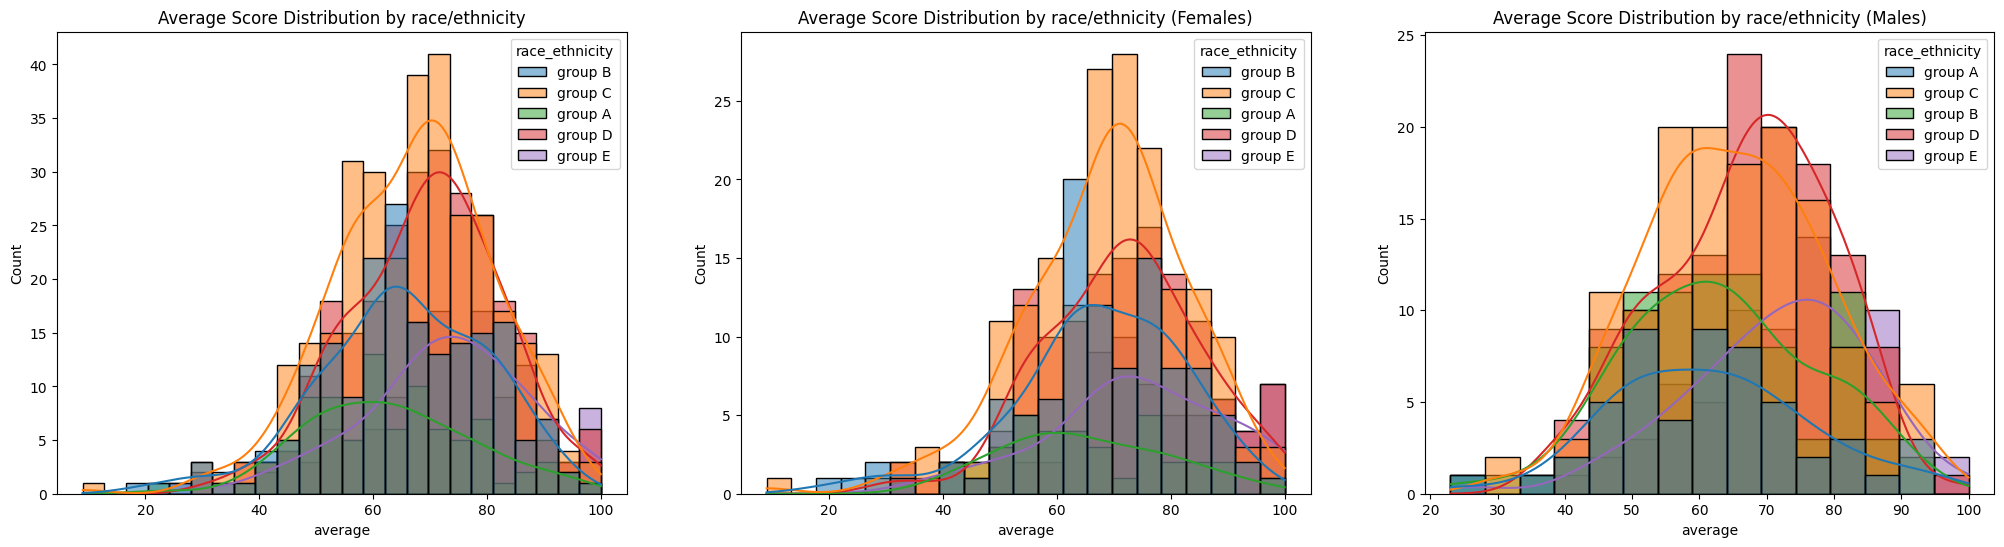

In [85]:
# Plot average score distribution by parental level of education
fig, axs = plt.subplots(1, 3, figsize=(25, 6))


axs[0].set_title('Average Score Distribution by race/ethnicity')
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])


axs[1].set_title('Average Score Distribution by race/ethnicity (Females)')
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])


axs[2].set_title('Average Score Distribution by race/ethnicity (Males)')
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])
plt.show()

Student s average score from group A,B distribution tends to perform poorly irrespectively of whether they are male or female 

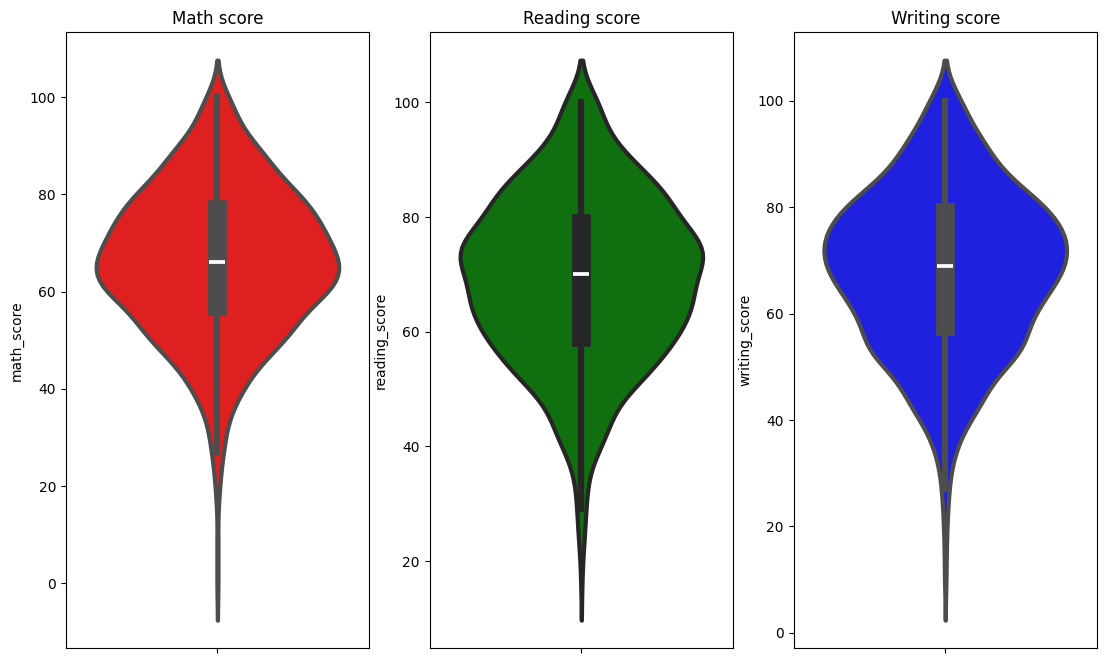

In [86]:
# Plot average score distribution by parental level of education
plt.figure(figsize=(18, 8))

plt.subplot(1,4,1)
plt.title('Math score')
sns.violinplot(data=df, y = 'math_score',color ='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')  
sns.violinplot(data=df, y = 'reading_score',color ='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing score')
sns.violinplot(data=df, y = 'writing_score',color ='blue', linewidth=3)
plt.show()

So from the above we can see that on writing student s tend to perform better.

## Multivariate analysis using pairplot

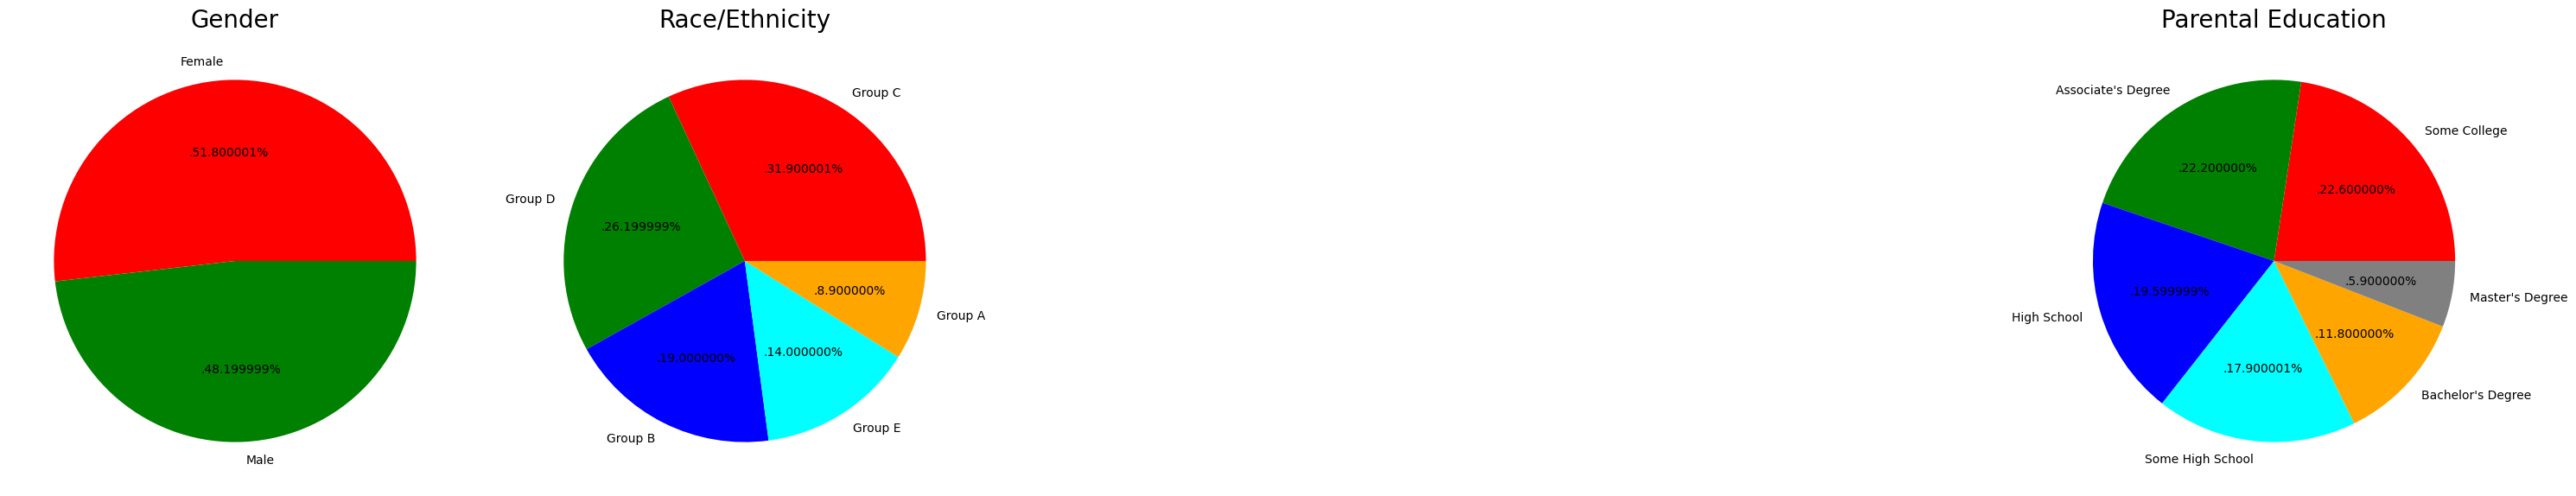

In [87]:
plt.rcParams['figure.figsize'] = (30, 12)


#First pie chart (gender)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


#Second pie chart (race_ethnicity)
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


#Third pie chart (lunch)
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

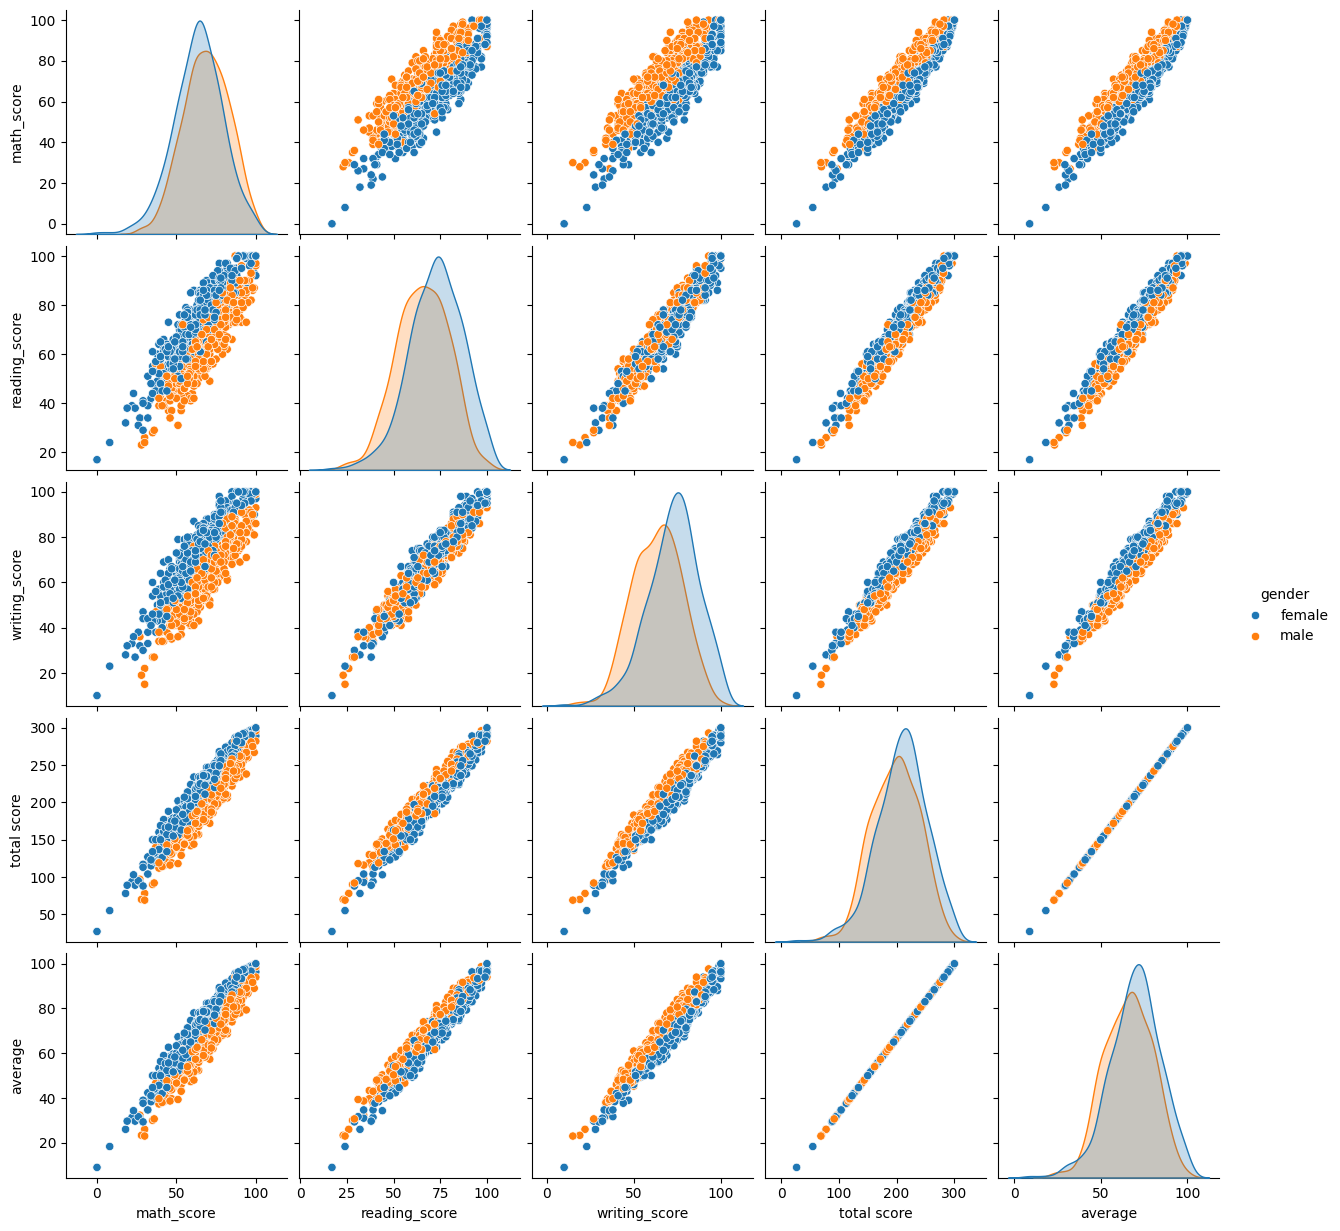

In [88]:
sns.pairplot(df,hue = 'gender')
plt.show()

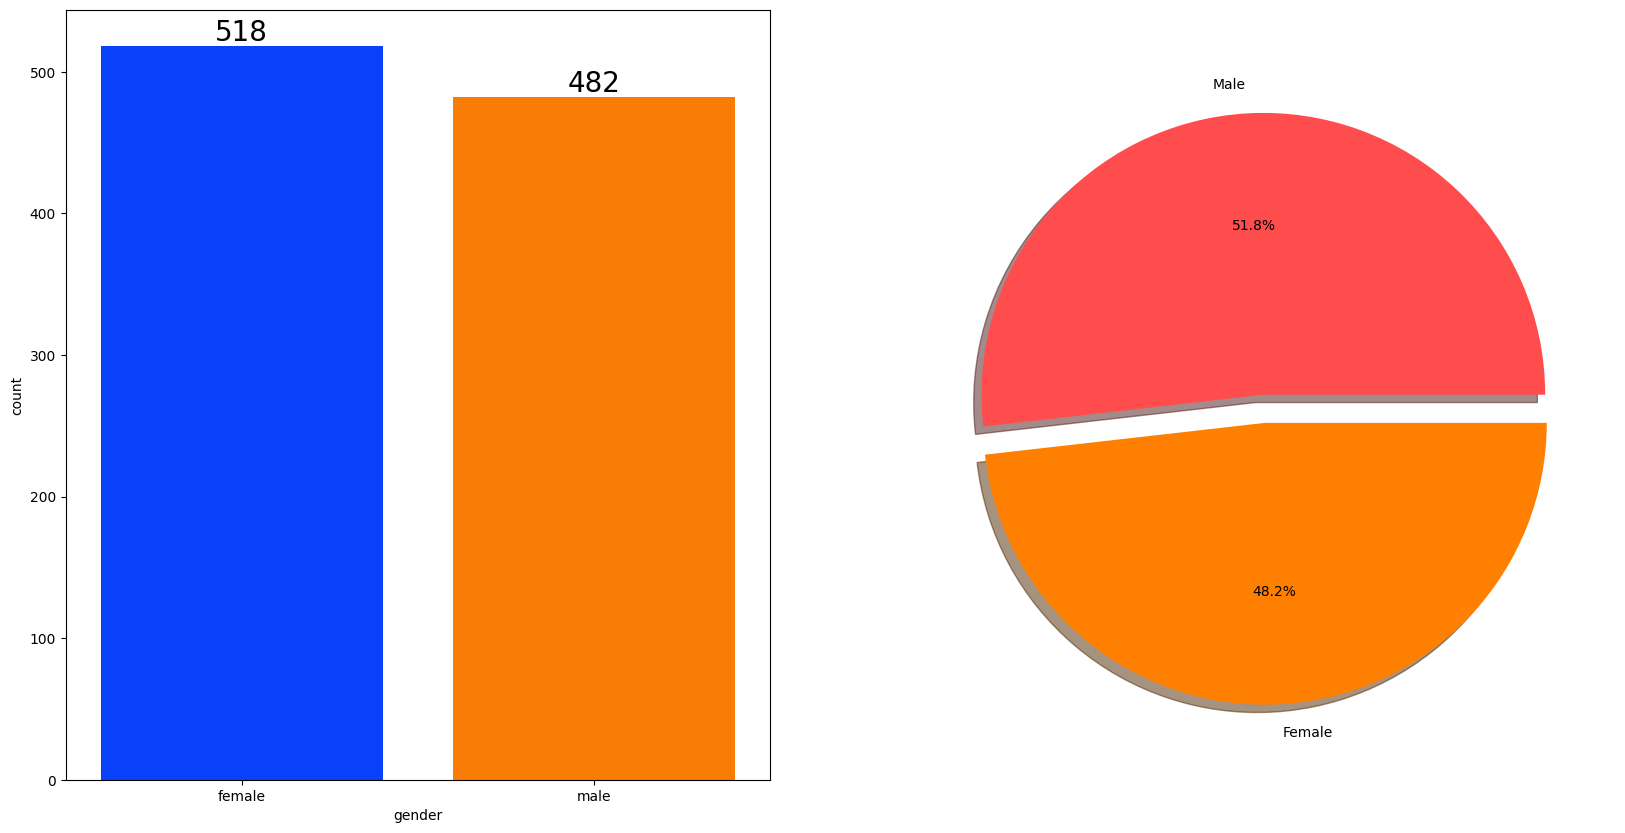

In [ ]:
#Distribution of gender in the dataset 
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Bivariate analysis

Is gender has any impact on student's performance ?

In [90]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


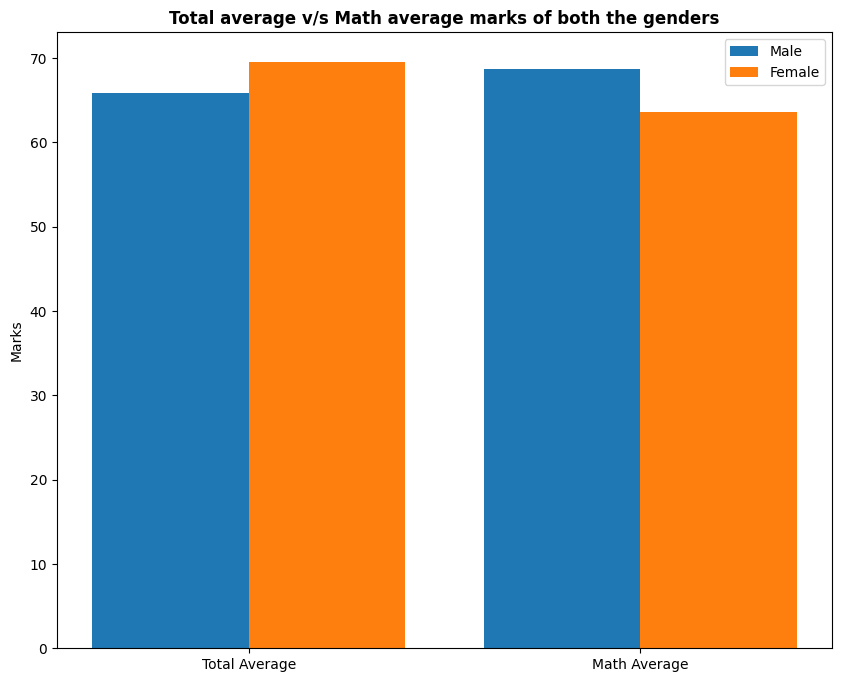

In [93]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

So as we can see from the above there is no big difference between males and females on total average score.  
But on math average score there is a big difference in math average.

# How is Group wise distribution ?

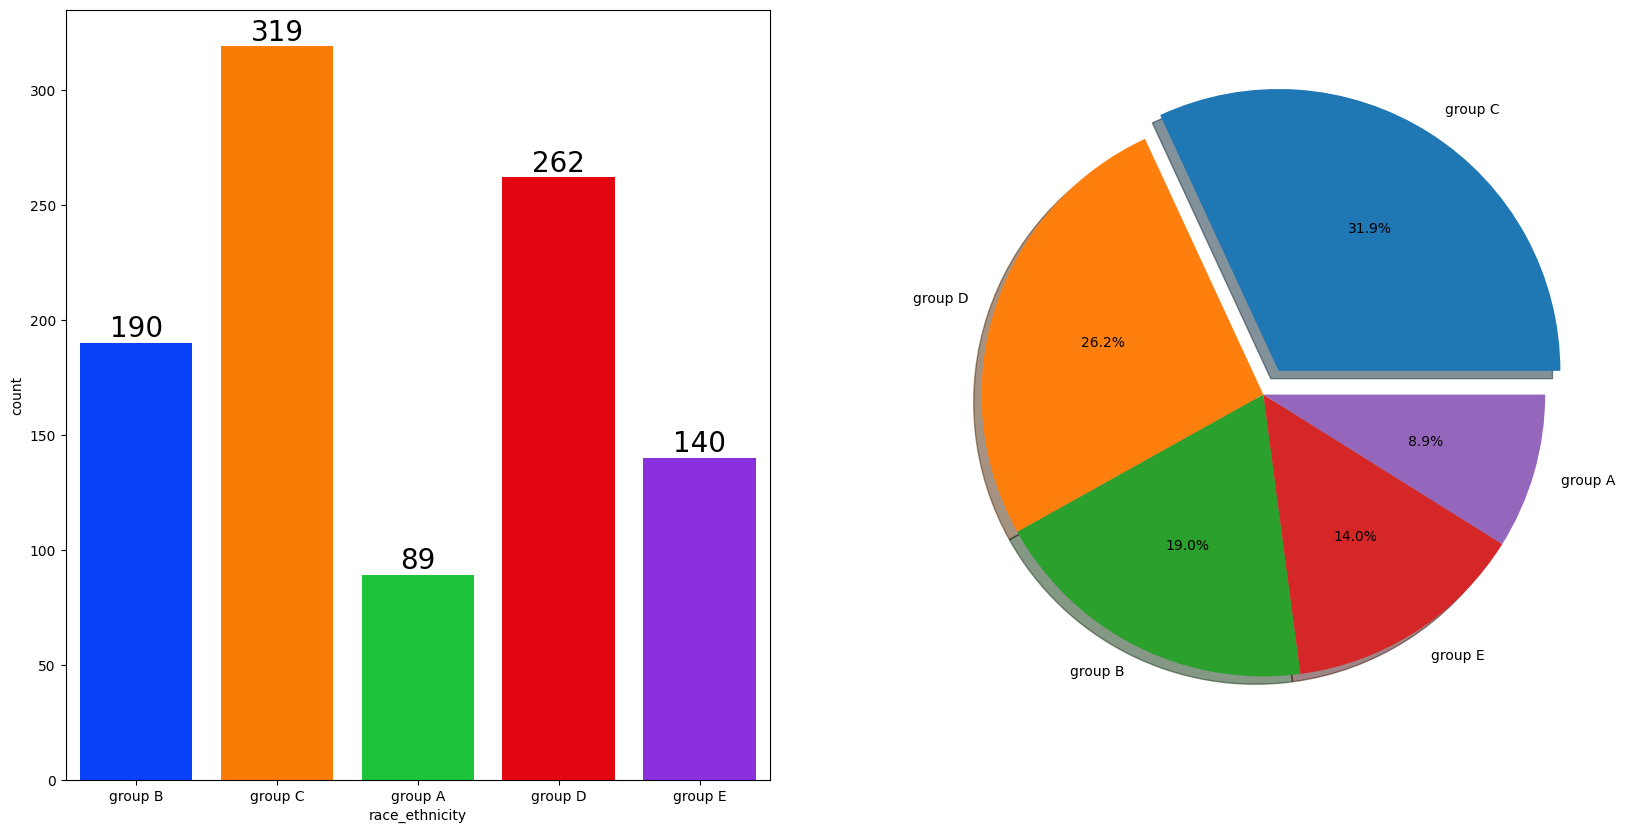

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Most students are belong to group C and group D category

# Is Race/Ethnicity has any impact on student's performance ?

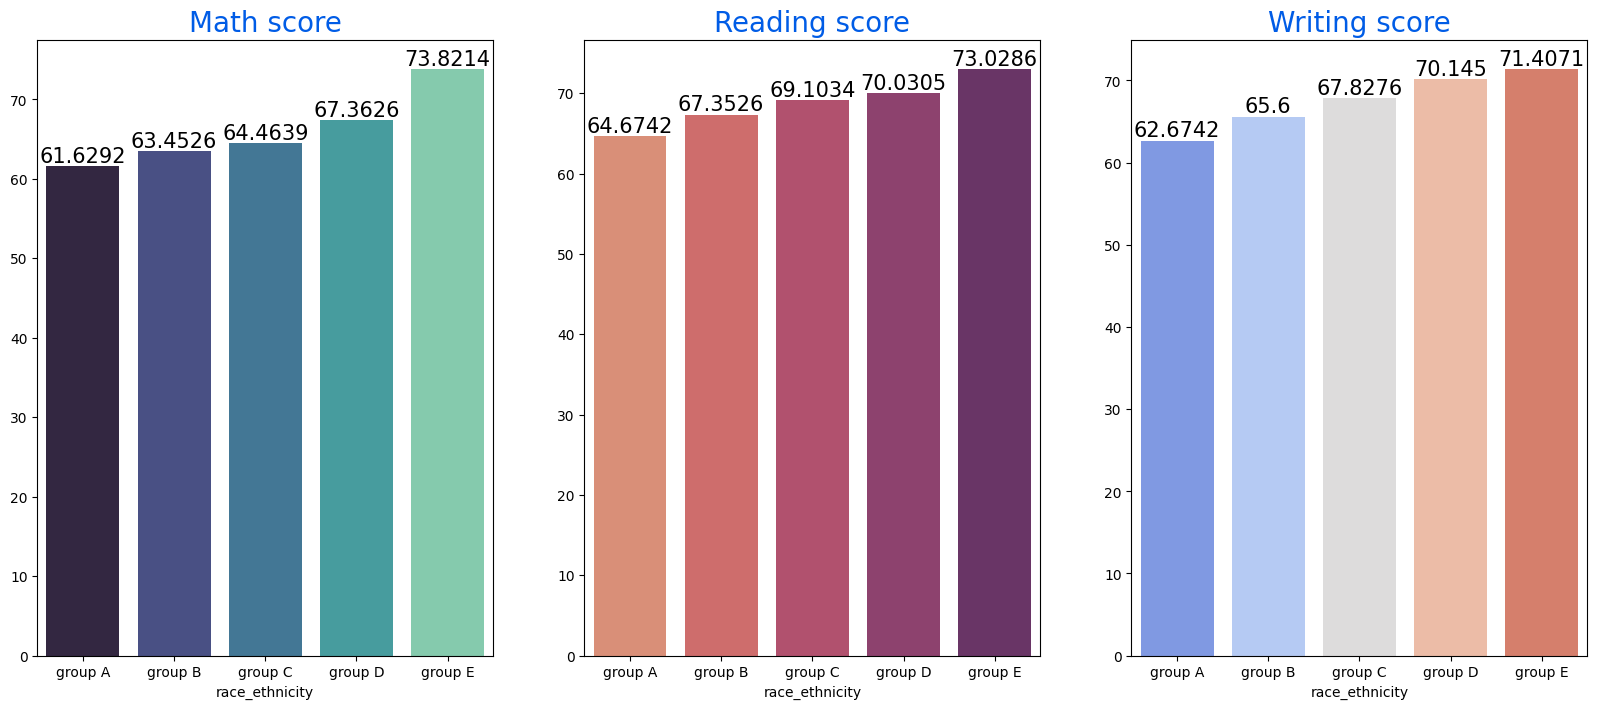

In [96]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

The differences among groups suggest that race/ethnicity could correlate with performance because as we can see groups with lower socioeconomic background have a lower ang in course subjects

# What is educational background of student's parent ?

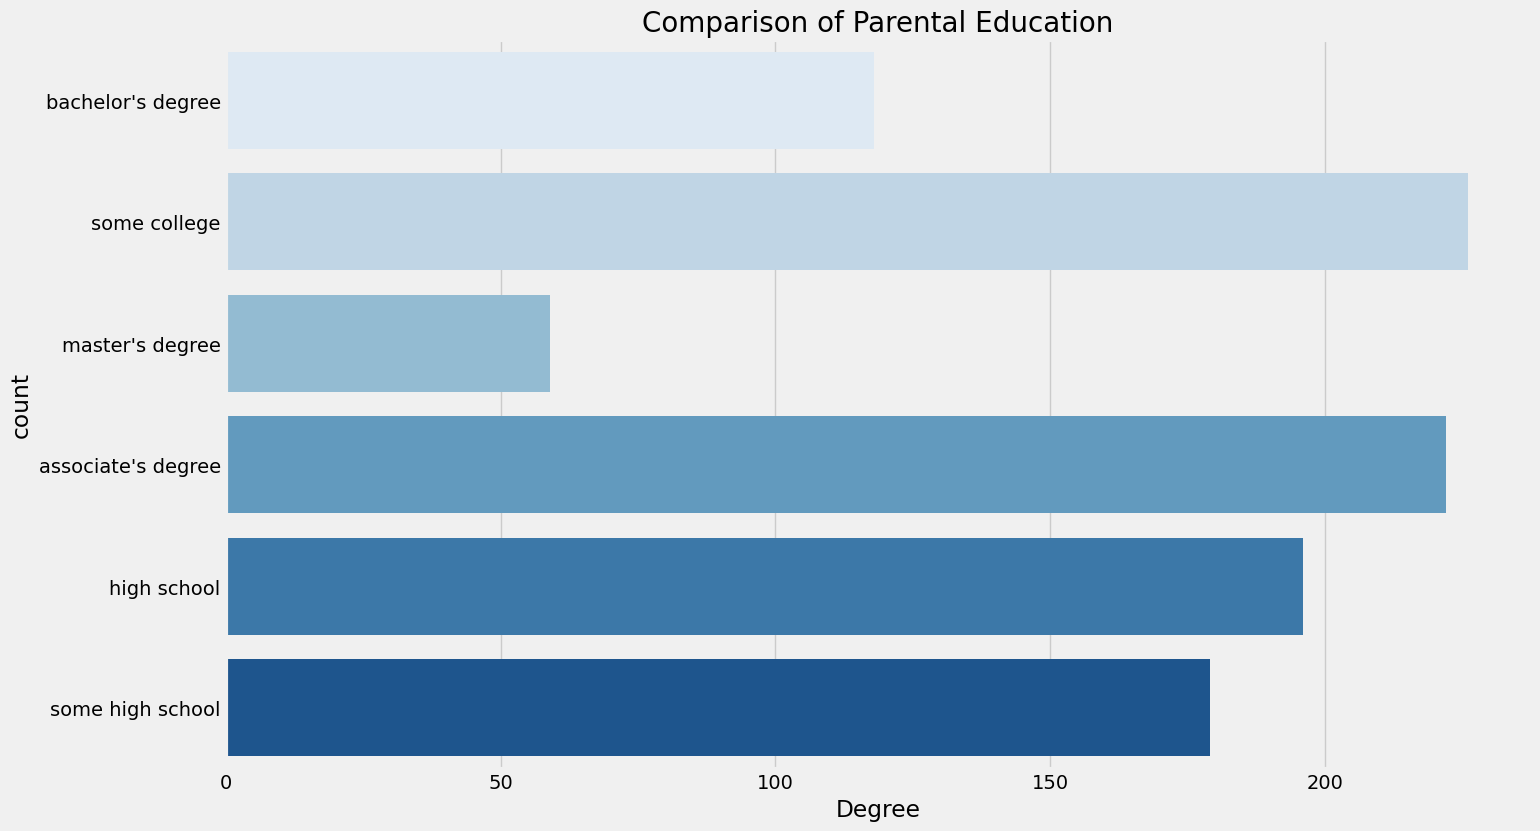

In [98]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Is parental education has any impact on student's performance ?

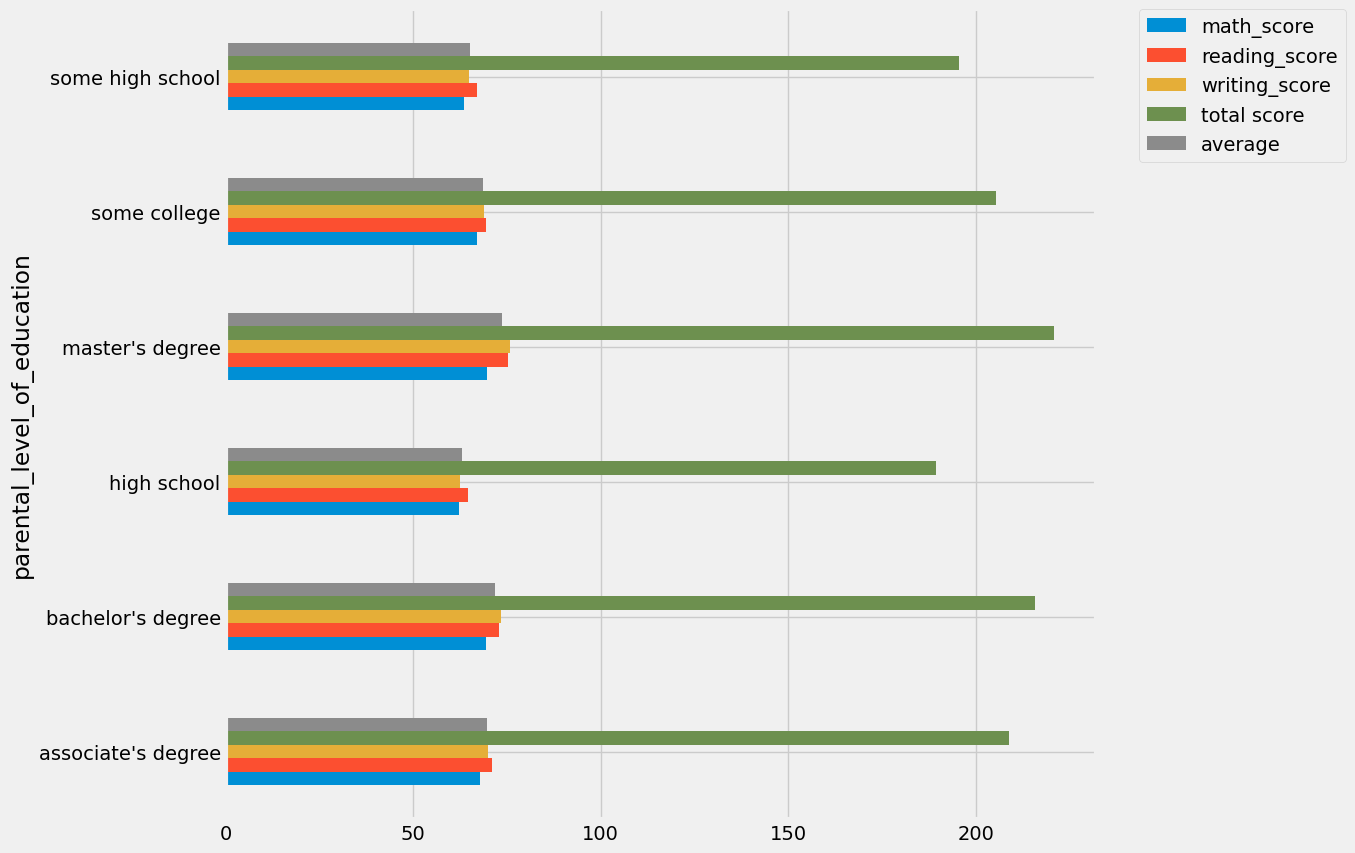

In [101]:
df.groupby('parental_level_of_education').agg('mean',numeric_only = True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Student 's whose parents have a master's/bachelor 's degree have the highest average score in all subjects, while students whose parents have only completed some high school have the lowest average score in all subjects.

# Which type of lunch is most common amoung students ? 

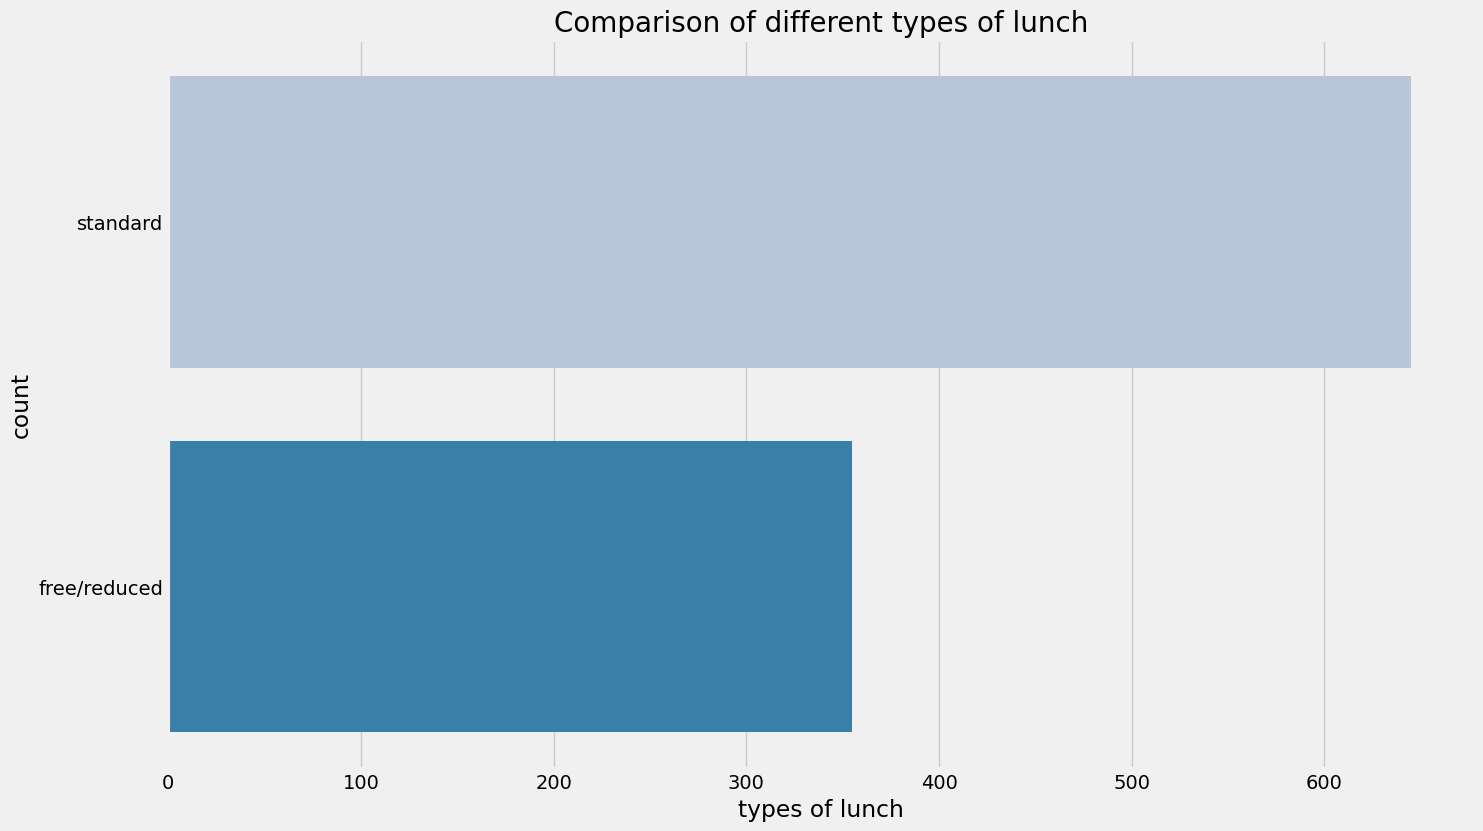

In [103]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# Is lunch type has any impact on student 's performance

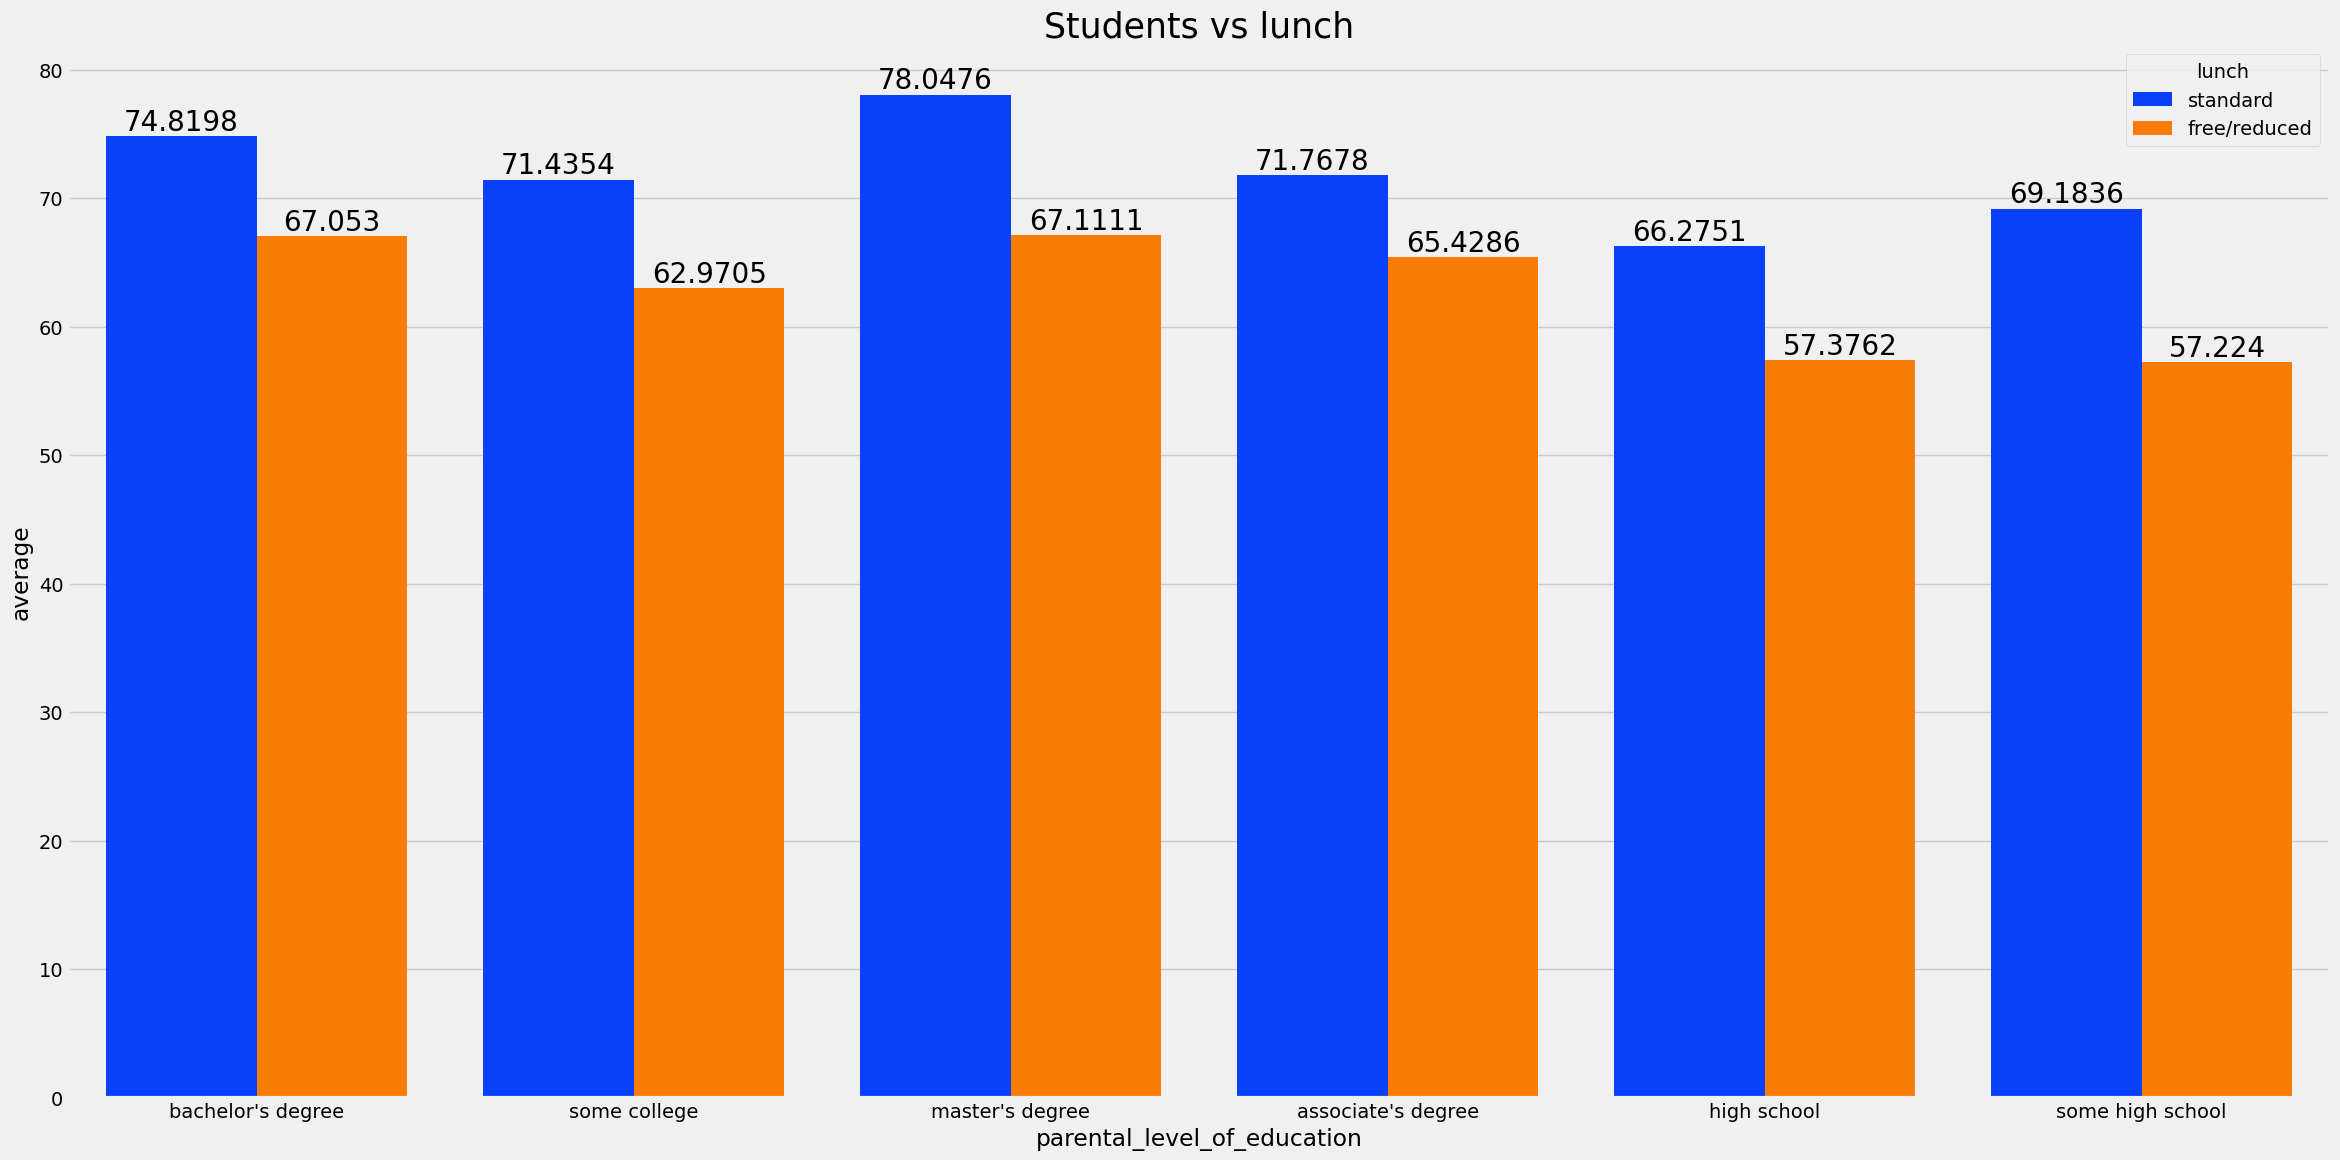

In [128]:
f, ax = plt.subplots(figsize=(26, 13))
sns.barplot(x='parental_level_of_education', y='average', data=df, palette='bright', hue='lunch', saturation=0.95,ci = None)
ax.set_title('Students vs lunch', color='black', size=25)
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)

Student with standard lunch type tend to perform better than students who got reduced lunch

# Is Test prepration course has any impact on student's performance?

<Axes: xlabel='lunch', ylabel='writing_score'>

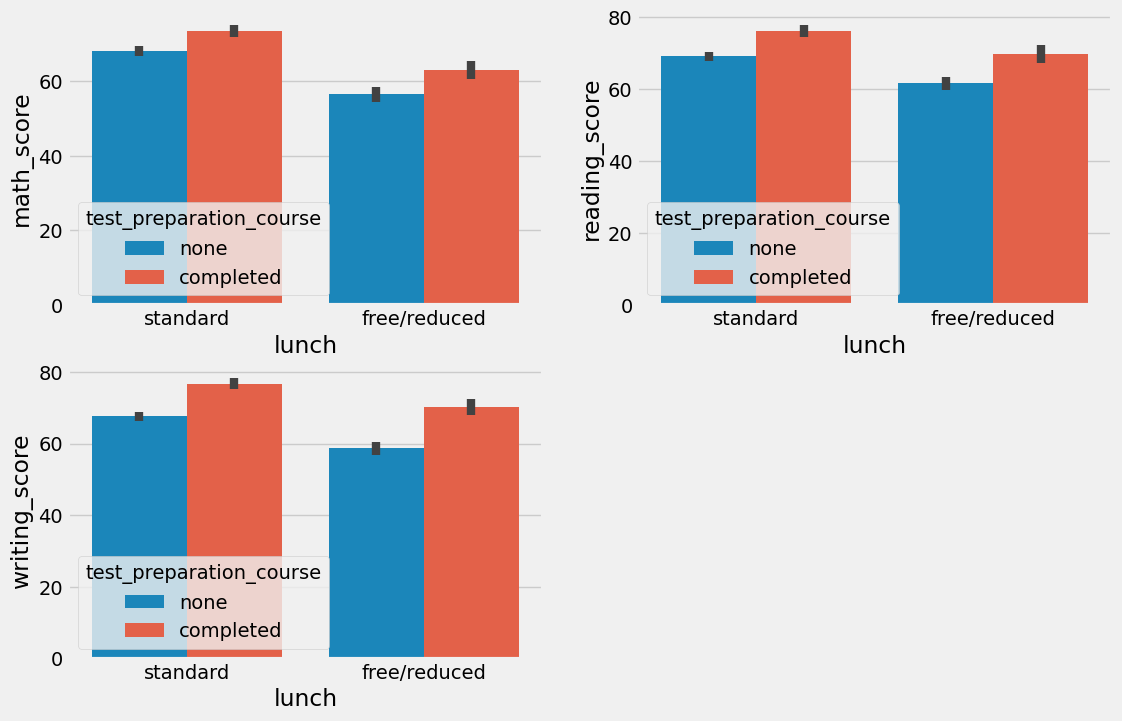

In [132]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Students with completed test preparation course have higher scores in all subjects compared to students who have not completed the test preparation course.

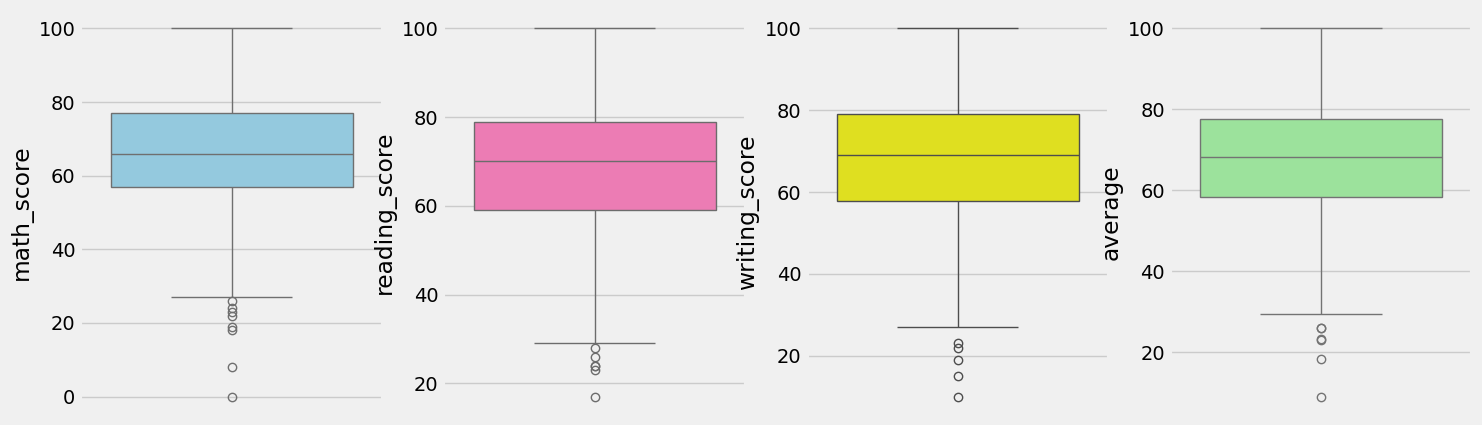

In [135]:
#Check for outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()